# Task 3 :Customer Segmentation


# **Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Load Dataset**

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Select Features**

In [3]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# **Scaling**

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **KMeans Model**

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# **Add Cluster Column**

In [6]:
data['Cluster'] = clusters
data.head()
data['Cluster'].value_counts()


,count
Cluster,
0,81
1,39
3,35
4,23
2,22


# **Visualization**

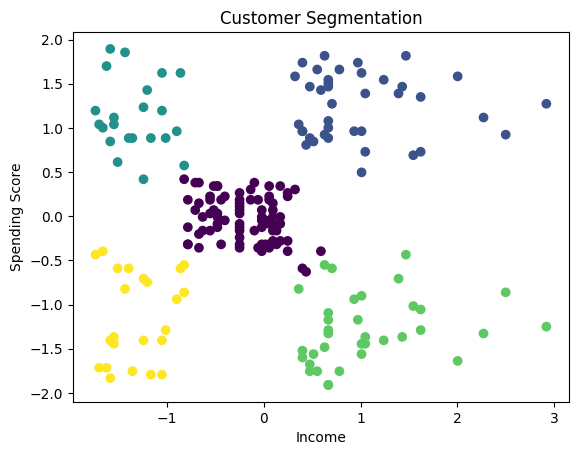

In [7]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()

In [8]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


We're looking good with a Silhouette Score of 0.55 ! It means KMeans clustering did its job segmenting customers into clear groups based on income and spending patterns.